In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

# Reconstruction - Analogues

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

 $$\textbf{Model: } z = x^2 + y^2$$

First, we create a matrix for x and y, and apply the model above to obtain z

In [2]:
n_disc = 100 #Discretizations in x and y axis

xp, yp = np.meshgrid(np.linspace(0,1,n_disc), np.linspace(0,1,n_disc)) #Matrix
zp = (xp**2) + (yp**2) #Vector

x, y, z = xp.reshape(-1), yp.reshape(-1), zp.reshape(-1) #Vectors

In [3]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

- Select a Random number of x, y and z values

In [4]:
n_random = 50 #Number of random values to choosse

In [5]:
df_sel = df.sample(n=n_random).reset_index()

Text(0.5, 0.92, 'Selected Points')

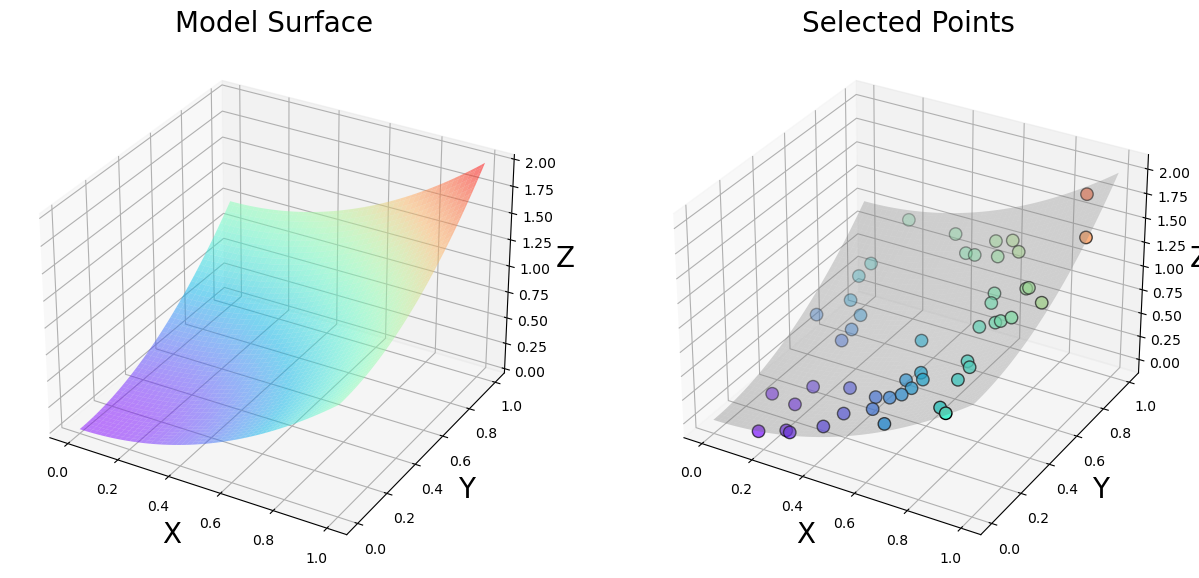

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
ax1.scatter(df_sel['x'].values, df_sel['y'].values, df_sel['z'].values,
            s = 80, c= df_sel['z'].values, vmin = z.min(), vmax = z.max(), edgecolor = 'black', zorder=3, cmap = 'rainbow')
ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points', fontsize = 20)


**We need to fit the analogues method with the selected points:** ***df_sel***

In [7]:
n_analogue = 4 #Number of analogues to select

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df_sel[['x', 'y']].values)
y = df_sel['z']

neigh = KNeighborsRegressor(n_neighbors=n_analogue)
neigh.fit(X_train_minmax, y)


KNeighborsRegressor(n_neighbors=4)

In [9]:
dist, i_an = neigh.kneighbors(
        min_max_scaler.transform(df[['x','y']].values),
        return_distance = True,
    )
# Multiplier factor, inverse of distance
factor = np.transpose((1/dist).T/np.sum(1/dist, axis=1))

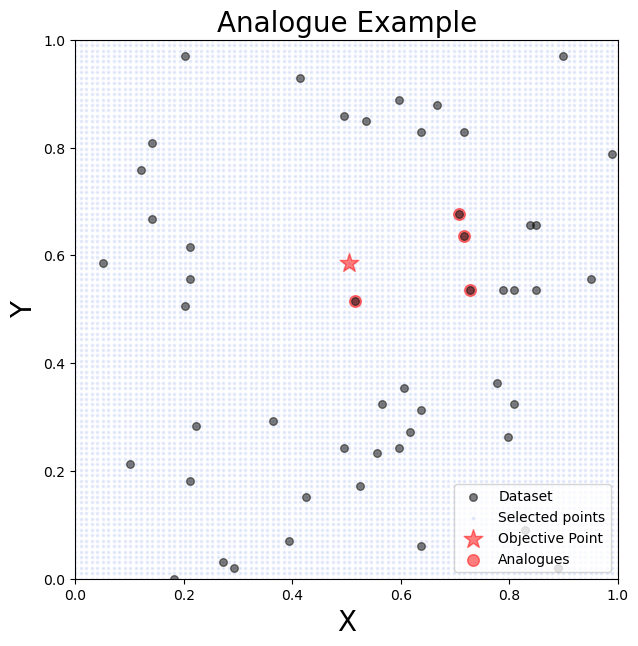

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.scatter(df_sel['x'].values, df_sel['y'].values,  s=30,  c = 'k', alpha=.5, zorder = 2, label = 'Dataset')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_title('Analogue Example', fontsize = 20)

#point i

i=5850

ax.scatter(df['x'].values, df['y'].values,  s=5,  c = 'royalblue', marker = '*', alpha=.1, label = 'Selected points')
ax.scatter(df['x'].values[i], df['y'].values[i],  s=200,  c = 'r', marker = '*', alpha=.5, label = 'Objective Point')
ax.scatter(df_sel['x'].values[i_an[i]], df_sel['y'].values[i_an[i]],  s=70,  c = 'r', alpha=.5, label = 'Analogues')

ax.set_xlim([df.x.min(), df.x.max()])
ax.set_ylim([df.y.min(), df.y.max()])

ax.legend(loc=4)

## Reconstruct surface

To reconstruct we need to multiply each analogue for its factor (distance inverse)

In [11]:
z_rec = np.sum(df_sel['z'].values[i_an]*factor, axis=1)

In [12]:
#Convert to matrix for plotting surface
z_rec_p = np.reshape(z_rec, np.shape(zp))

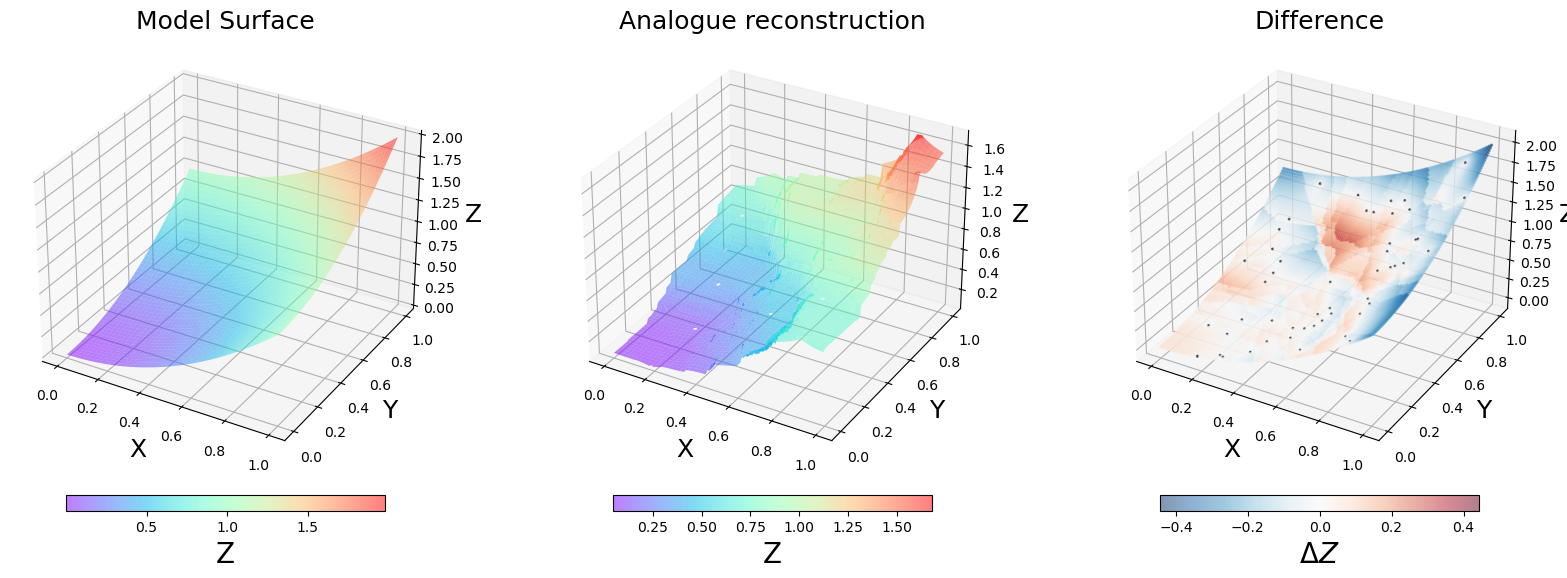

In [14]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(131, projection='3d')
im = ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 18)
ax.set_ylabel('Y', fontsize = 18)
ax.set_zlabel('Z', fontsize = 18)
ax.set_title('Model Surface', fontsize = 18)
plt.colorbar(im, orientation = 'horizontal', pad = 0.05, shrink = .7).set_label('Z', fontsize = 20)

ax1 = fig.add_subplot(132, projection='3d')
im = ax1.plot_surface(xp, yp, z_rec_p, alpha=.5,  cmap='rainbow')
ax1.set_xlabel('X', fontsize = 18)
ax1.set_ylabel('Y', fontsize = 18)
ax1.set_zlabel('Z', fontsize = 18)
ax1.set_title('Analogue reconstruction', fontsize = 18)
plt.colorbar(im, orientation = 'horizontal', pad = 0.05, shrink = .7).set_label('Z', fontsize = 20)

ax2 = fig.add_subplot(133, projection='3d')
lim=np.nanmax([np.abs(np.nanmin(z_rec_p-zp)), np.abs(np.nanmax(z_rec_p-zp))])
im = ax2.scatter(xp, yp, zp, s=2, c = z_rec_p-zp, alpha=.5,  cmap='RdBu_r', vmin = -lim, vmax=lim)
ax2.set_xlabel('X', fontsize = 18)
ax2.set_ylabel('Y', fontsize = 18)
ax2.set_zlabel('Z', fontsize = 18)
ax2.set_title('Difference', fontsize = 18)
plt.colorbar(im, orientation = 'horizontal', pad = 0.05, shrink = .7).set_label('$\Delta Z$', fontsize = 20)